# Model Validation

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Model Capacity

* import Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* pandas DataFrame
 - 'Electric.csv' From github

In [3]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [4]:
Elec.tail()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,178.8
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,165.4
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,164.4
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,164.8
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,166.4


* 산점도(surface_area vs. electricity)

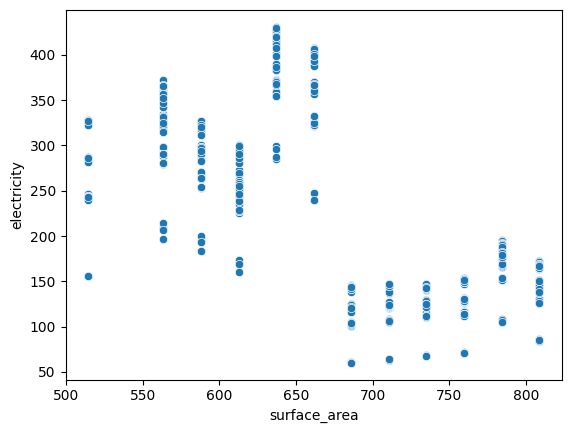

In [5]:
sns.scatterplot(data = Elec,
                x = 'surface_area',
                y = 'electricity')
plt.show()

> ## 1) 1차 모델 시각화

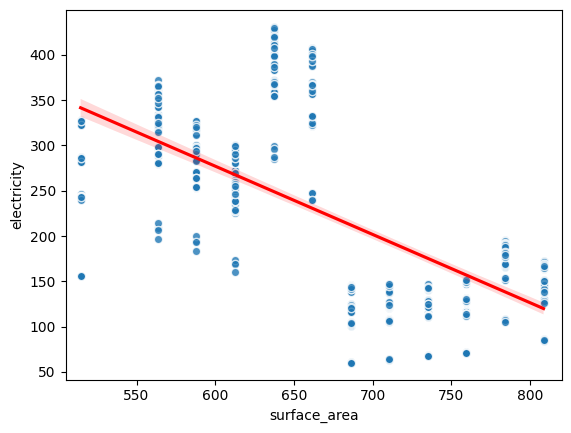

In [6]:
sns.regplot(data = Elec,
            x = 'surface_area',
            y = 'electricity',
            line_kws = {'color':'red'},
            scatter_kws = {'edgecolor' : 'white'}, order=1)
plt.xlim(505, 820)
plt.show()

> ## 2) 2차 모델 시각화

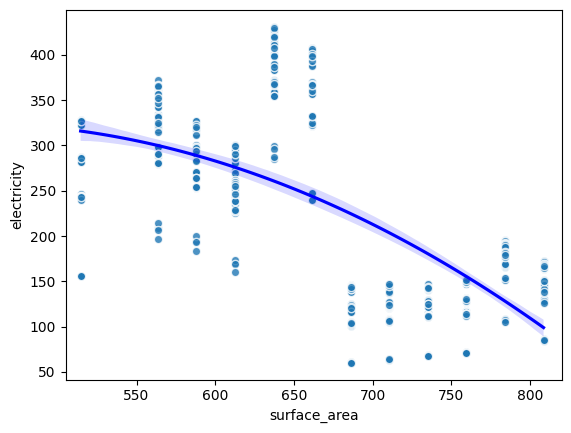

In [7]:
sns.regplot(data = Elec,
            x = 'surface_area',
            y = 'electricity',
            line_kws = {'color':'blue'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 2)
plt.xlim(505, 820)
plt.show()

> ## 3) 5차 모델 시각화

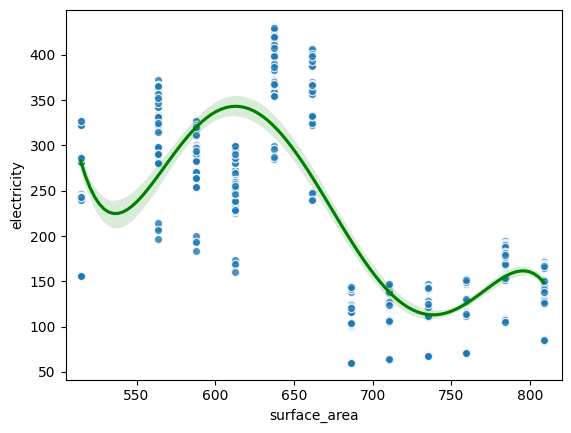

In [8]:
sns.regplot(data = Elec,
            x = 'surface_area',
            y = 'electricity',
            line_kws = {'color':'green'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 5)
plt.xlim(505, 820)
plt.show()

> ## 4) 9차 모델 시각화

In [ ]:
sns.regplot(data = Elec,
            x = 'surface_area',
            y = 'electricity',
            line_kws = {'color':'orange'},
            scatter_kws = {'edgecolor':'white'},
            order = 9)
plt.xlim(505, 820)
plt.ylim(-50, 450)
plt.show()

> ## 5) 4개 모델 비교 시각화

In [ ]:
sns.regplot(data = Elec, x = 'surface_area', y = 'electricity',
            line_kws = {'color':'red'})
sns.regplot(data = Elec, x = 'surface_area', y = 'electricity',
            line_kws = {'color':'blue'}, order = 2)
sns.regplot(data = Elec, x = 'surface_area', y = 'electricity',
            line_kws = {'color':'green'}, order = 5)
sns.regplot(data = Elec, x = 'surface_area', y = 'electricity',
            line_kws = {'color':'orange'}, order = 9,
            scatter_kws = {'color':'gray', 'edgecolor':'white'})
plt.xlim(505, 820)
plt.ylim(50, 450)
plt.xticks(rotation = 35)
plt.yticks(rotation = 90)
plt.show()

# II. Training Error
* import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* pandas DataFrame
 - 'Electric.csv' From github

In [ ]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

> ## 1) 1차 모델 Training Error

* X_train and y_train

In [ ]:
X_train = Elec[['surface_area']]
y_train = Elec['electricity']

X_train.shape, y_train.shape

* 모델 생성

In [ ]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

* 모델 정보(학습결과) 확인

In [ ]:
print(Model_1.coef_)
print(Model_1.intercept_)

* y_hat(예측값) 생성

In [ ]:
y_hat_1 = Model_1.predict(X_train)

len(y_hat_1)

* MSE(Mean Squared Error) 계산

In [ ]:
TR_Err_1 = np.mean((y_train - y_hat_1) ** 2)
TR_Err_1

> ## 2) 5차 모델 Training Error

* X 다항차수 변환
 - (768, 1) to (768, 5)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5 = poly.fit_transform(X_train)

In [ ]:
PX_5

In [ ]:
X_train.shape, PX_5.shape

* 5차 모델 생성

In [ ]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5, y_train)

* 모델 정보(학습결과) 확인

In [ ]:
np.set_printoptions(suppress = True, precision = 40)

print(Model_5.coef_)
print(Model_5.intercept_)

* y_hat(예측값) 생성

In [ ]:
PX_5_pred = poly.fit_transform(X_train)

y_hat_5 = Model_5.predict(PX_5_pred)

y_hat_5.shape

* MSE(Mean Squared Error) 계산

In [ ]:
TR_Err_5 = np.mean((y_train - y_hat_5) ** 2)
TR_Err_5

> ## 3) 9차 모델 Training Error

* X 다항차수 변환
 - (768, 1) to (768, 9)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9 = poly.fit_transform(X_train)

In [ ]:
X_train.shape, PX_9.shape

* 모델 생성

In [ ]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

* 모델 정보(학습결과) 확인

In [ ]:
print(Model_9.coef_)
print(Model_9.intercept_)

* y_hat(예측값) 생성

In [ ]:
PX_9_pred = poly.fit_transform(X_train)

y_hat_9 = Model_9.predict(PX_9_pred)

y_hat_9.shape

* MSE(Mean Squared Error) 계산

In [ ]:
TR_Err_9 = np.mean((y_train - y_hat_9) ** 2)
TR_Err_9

> ## 4) 3개 모델 Training Error 비교

In [ ]:
print('1차 모델 : ', TR_Err_1)
print('5차 모델 : ', TR_Err_5)
print('9차 모델 : ', TR_Err_9)

# III. Testing Error
* import Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* pandas DataFrame
 - 'Electric.csv' From github

In [ ]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.shape

> ## Train_Data vs. Test_Data

### (1) DataFrame Split
* 8:2 Split(614:154)
* 80% Train_DF & 20% Test_DF

In [ ]:
from sklearn.model_selection import train_test_split

TR_Elec, TE_Elec = train_test_split(Elec,
                                    test_size = 0.2,
                                    random_state = 2045)

In [ ]:
TR_Elec.shape, TE_Elec.shape

* 80% TR_Elec DataFrame

In [ ]:
TR_Elec.head()

* 20% TE_Elec DataFrame

In [ ]:
TE_Elec.head()

### (2) Array Split
* X_train(614, 1), X_test(614,) & y_train(154, 1), y_test(154,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Elec[['surface_area']],
                                                    Elec['electricity'],
                                                    test_size = 0.2,
                                                    random_state = 2045)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

* 80% X_train Array

In [ ]:
X_train.head()

* 80% y_train Array

In [ ]:
y_train.head()

### (3) Distribution Visualization

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.scatterplot(data = TR_Elec,
                x = 'surface_area',
                y = 'electricity',
                ax = ax[0])
sns.scatterplot(data = TE_Elec,
                x = 'surface_area',
                y = 'electricity',
                ax = ax[1])

ax[0].set_title('Train Data Distribution', size = 15)
ax[1].set_title('Test Data Distribution', size = 15)

plt.show()

> ## 1) 1차 모델 Testing Error

* Train_Data로 모델 생성

In [ ]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

* Test_Data로 y_hat(예측값) 생성

In [ ]:
y_hat_1 = Model_1.predict(X_test)

y_hat_1.shape

* Test_Data로 MSE(Mean Squared Error) 계산

In [ ]:
from sklearn.metrics import mean_squared_error

TE_Err_1 = mean_squared_error(y_test, y_hat_1)
TE_Err_1

> ## 2) 5차 모델 Testing Error

* Train_Data로 모델 생성

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

* Test_Data로 y_hat(예측값) 생성

In [ ]:
PX_5_TE = poly.fit_transform(X_test)

y_hat_5 = Model_5.predict(PX_5_TE)

* Test_Data로 MSE(Mean Squared Error) 계산

In [ ]:
from sklearn.metrics import mean_squared_error

TE_Err_5 = mean_squared_error(y_test, y_hat_5)
TE_Err_5

> ## 3) 9차 모델 Testing Error

* Train_Data로 모델 생성

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

* Test_Data로 y_hat(예측값) 생성

In [ ]:
PX_9_TE = poly.fit_transform(X_test)

y_hat_9 = Model_9.predict(PX_9_TE)

* Test_Data로 MSE(Mean Squared Error) 계산

In [ ]:
from sklearn.metrics import mean_squared_error

TE_Err_9 = mean_squared_error(y_test, y_hat_9)
TE_Err_9

> ## 4) 3개 모델 Testing Error 비교

In [ ]:
print('1차 모델 : ', TE_Err_1)
print('5차 모델 : ', TE_Err_5)
print('9차 모델 : ', TE_Err_9)

#
#
#
# End Of Document
#
#
#